<div style="text-align: center;">

<h1>How to manage multi-dimensional arrays?</h1>

<img src="https://xarray.pydata.org/en/stable/_static/dataset-diagram-logo.png" style="width: 60%" align="middle">
    
<h2>by Agustina Pesce</h2>

<h2>Seminário do Laboratório de Tectonofísica</h2>

    

    
</div>

# Xarray package

## What is Xarray?

* An open source project and Python package

* ``xarray`` makes working with labelled multi-dimensional arrays simple, efficient, and fun!

* It introduces labels in the form of dimensions, coordinates and attributes on NumPy arrays, which allows for a more intuitive, simpler and less error developer experience.

* Is combines the best of [Pandas](https://pandas.pydata.org/), [NumPy](https://numpy.org/), NetCDF and [Dask](https://dask.org/).


## What is Xarray good for?

* Gridded, multi-dimensional and large datasets, commonly used in earth sciences

* Integration with other data analysis packages

* I/O operations (netCDF)

* Plotting



## Why is Xarray useful in geophysics? 
``xarray`` is useful to group information that shares the same dimensions or coordinates.

__Example:__ 
* For GPS stations, where the altitude variations over time are measured.
You have 2 dimension (time and station name) and 1 data variable (altitude).
If there is more than one station, stations names are a dimension.

* For gravity and magnetism data. These data are measured at the same coordinates points and sometimes you also have density and susceptibility information in the same points. 
In this case, you have 2 dimention and 4 data variables.

* You want to map a certain temperature data to latitude, longitude, depth and time. 
This is 4 dimensions and one data variable.


## Data structures
``xarray`` has two data structures:

* __DataArray__ — for a single data variable
* __Dataset__ — a container for multiple DataArrays (data variables)

For __more information__ about ``xarray``:

[Xarray web](https://xarray.pydata.org/en/stable/)

[Fast tutorial](http://pure.iiasa.ac.at/id/eprint/14952/1/xarray-tutorial-egu2017-answers.pdf)

## A Dataset

In [1]:
# Import xarray
import xarray as xr

# RockHound is a Python library to download geophysical models and datasets. 
# It is part of Fatiando Poroject
import rockhound as rh

# To plot
import matplotlib.pyplot as plt
from matplotlib import rcParams

# Change default dpi of matplotlib figures for presentation
rcParams["figure.dpi"] = 120

In [2]:
# Load the grids of the age of the oceanic lithosphere 
grid = rh.fetch_seafloor_age()

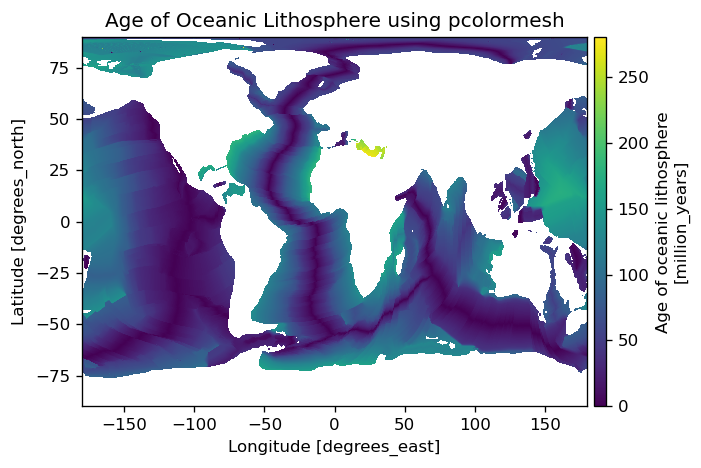

In [5]:
# We're not using a map projection to speed up the plotting but this NOT recommended.
grid.age.plot.pcolormesh(cbar_kwargs=dict(pad=0.01, aspect=30))

plt.gca().set_title("Age of Oceanic Lithosphere using pcolormesh")
plt.tight_layout()

In [21]:
grid

<xarray.Dataset>
Dimensions:      (latitude: 1801, longitude: 3601)
Coordinates:
  * latitude     (latitude) float32 -90.0 -89.9 -89.8 -89.7 ... 89.8 89.9 90.0
  * longitude    (longitude) float32 -180.0 -179.9 -179.8 ... 179.8 179.9 180.0
Data variables:
    age          (latitude, longitude) float32 nan nan nan ... 55.42 55.42 55.42
    uncertainty  (latitude, longitude) float32 nan nan nan ... 15.0 15.0 15.0
Attributes:
    title:    Age of oceanic lithosphere
    doi:      10.1029/2007GC001743

We can access the ages through the `age` attribute:

In [19]:
grid.age

<xarray.DataArray 'age' (latitude: 1801, longitude: 3601)>
array([[  nan,   nan,   nan, ...,   nan,   nan,   nan],
       [  nan,   nan,   nan, ...,   nan,   nan,   nan],
       [  nan,   nan,   nan, ...,   nan,   nan,   nan],
       ...,
       [55.57, 55.55, 55.61, ..., 55.56, 55.56, 55.57],
       [55.37, 55.37, 55.36, ..., 55.36, 55.36, 55.36],
       [55.57, 55.57, 55.57, ..., 55.42, 55.42, 55.42]], dtype=float32)
Coordinates:
  * latitude   (latitude) float32 -90.0 -89.9 -89.8 -89.7 ... 89.8 89.9 90.0
  * longitude  (longitude) float32 -180.0 -179.9 -179.8 ... 179.8 179.9 180.0
Attributes:
    long_name:  Age of oceanic lithosphere
    units:      million_years

A ``xr.Dataset`` is a container of ``xr.DataArray``s

Under the hood, the values are stored as ``np.array``s:

In [7]:
grid.age.values

array([[  nan,   nan,   nan, ...,   nan,   nan,   nan],
       [  nan,   nan,   nan, ...,   nan,   nan,   nan],
       [  nan,   nan,   nan, ...,   nan,   nan,   nan],
       ...,
       [55.57, 55.55, 55.61, ..., 55.56, 55.56, 55.57],
       [55.37, 55.37, 55.36, ..., 55.36, 55.36, 55.36],
       [55.57, 55.57, 55.57, ..., 55.42, 55.42, 55.42]], dtype=float32)

The coordinates also are ``xr.DataArray``s

In [20]:
grid.longitude

<xarray.DataArray 'longitude' (longitude: 3601)>
array([-180. , -179.9, -179.8, ...,  179.8,  179.9,  180. ], dtype=float32)
Coordinates:
  * longitude  (longitude) float32 -180.0 -179.9 -179.8 ... 179.8 179.9 180.0
Attributes:
    long_name:     Longitude
    units:         degrees_east
    actual_range:  [-180.  180.]

The best thing about ``xarray`` is the possibility of doing things in a simple way.

For example: Cut the grid in a defined area.
``Xarray`` allows you to do it in just **one command line** using `sel()` method.

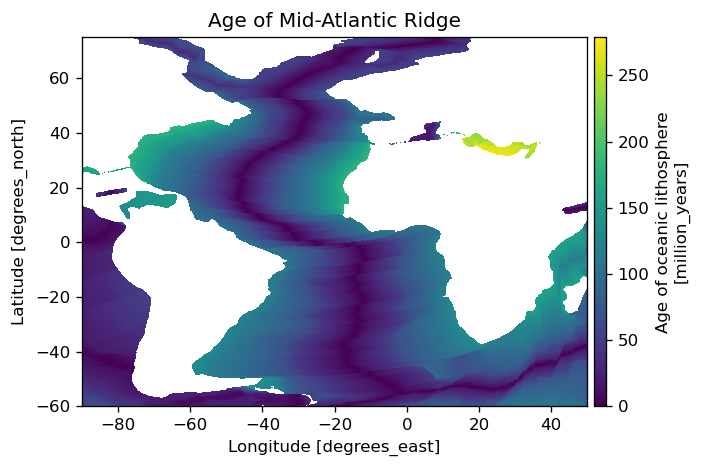

In [22]:
# Cut the grid in the interested area.
cut_grid = grid.sel(longitude=slice(-90, 50), latitude=slice(-60, 75))

# Plot:
cut_grid.age.plot.pcolormesh(cbar_kwargs=dict(pad=0.01, aspect=30))

plt.gca().set_title("Age of Mid-Atlantic Ridge")
plt.tight_layout()

## Save a xr.Dataset

In [17]:
grid.to_netcdf("dataset_age.nc")

__netCDF__ is a binary file format for self-described datasets that originated in the geosciences.
It is supported on almost all platforms, and parsers exist for the vast majority of scientific programming languages.

## More extra functionalities

In [9]:
# Tuple of dimension names associated with this data variable array.
grid.age.dims

('latitude', 'longitude')

In [10]:
# String with the unis of the data variable. 
grid.age.units

'million_years'

In [11]:
# Tuple with the shape associated with this data variable array.
grid.age.shape

(1801, 3601)

In [12]:
# Mapping from dimension names to lengths.
grid.dims

Frozen(SortedKeysDict({'longitude': 3601, 'latitude': 1801}))

In [13]:
# Get the point number on an axis
grid.dims["longitude"]

3601

In [14]:
# Dictionary of xarray.DataArray objects corresponding to coordinate variables
grid.coords

Coordinates:
  * latitude   (latitude) float32 -90.0 -89.9 -89.8 -89.7 ... 89.8 89.9 90.0
  * longitude  (longitude) float32 -180.0 -179.9 -179.8 ... 179.8 179.9 180.0

In [15]:
# Dictionary of global attributes on this dataset
grid.attrs

{'title': 'Age of oceanic lithosphere', 'doi': '10.1029/2007GC001743'}

In [16]:
grid.attrs["doi"]

'10.1029/2007GC001743'

On the website of Xarray, you can find other methods and attributes for [Dataset](https://xarray.pydata.org/en/stable/generated/xarray.Dataset.html#xarray.Dataset) and [DataArray](https://xarray.pydata.org/en/stable/generated/xarray.DataArray.html#xarray.DataArray)

### References:

[RockHound](https://www.fatiando.org/rockhound/latest/index.html) is a Python library to download geophysical models and dataset and load them into Python data structures (pandas, numpy, xarray).
It is part of [Fatiando project](https://www.fatiando.org/).

[Xarray](https://xarray.pydata.org/en/stable/)

[Fast tutorial](http://pure.iiasa.ac.at/id/eprint/14952/1/xarray-tutorial-egu2017-answers.pdf)
